
<h2 align="center">Predict Employee Churn using Decision Trees, Random Forests and Logistic Regression Models</h2>

###  Import Libraries
---

In [51]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd

plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [52]:
plt.rcParams['figure.figsize'] = (12,8)

### Exploratory Data Analysis
---

In [53]:
hr=pd.read_csv("C:/Users/Soundharyaa T V/Documents/ML Projects/Data/employee_data.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [54]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   quit                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [55]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [56]:
hr['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [57]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

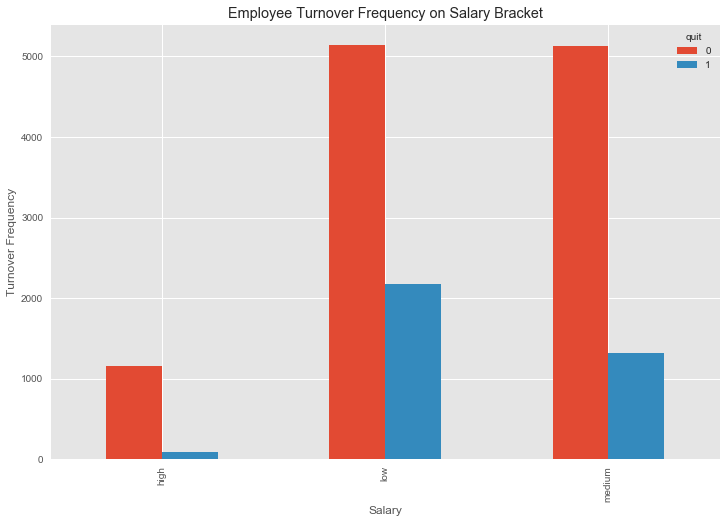

In [58]:
pd.crosstab(hr.salary,hr.quit).plot(kind="bar")
plt.title("Employee Turnover Frequency on Salary Bracket")
plt.xlabel("Salary")
plt.ylabel("Turnover Frequency")
plt.show()

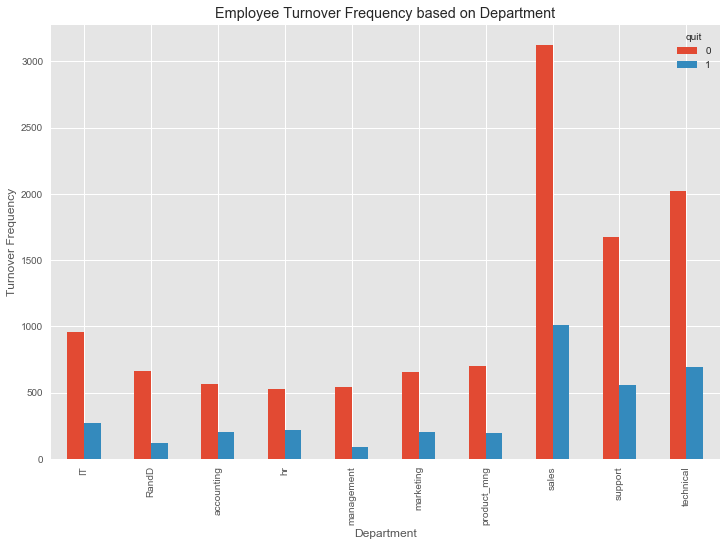

In [59]:
pd.crosstab(hr.department,hr.quit).plot(kind="bar")
plt.title("Employee Turnover Frequency based on Department")
plt.xlabel("Department")
plt.ylabel("Turnover Frequency")
plt.show()

###  Encode Categorical Features
---

In [60]:
cat_var=['department','salary']
for var in cat_var:
    cat_list=pd.get_dummies(hr[var])
    hr=hr.join(cat_list)

In [61]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [62]:
hr.drop(columns=['department','salary'],axis=1,inplace=True)

In [63]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,IT,RandD,...,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


###  Visualize Class Imbalance
---

In [64]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

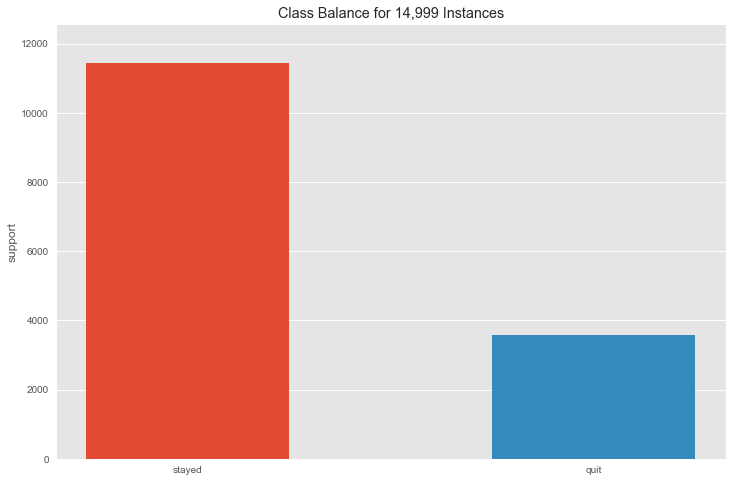

In [65]:
visualizer=ClassBalance(labels=['stayed','quit'])
visualizer.fit(hr.quit)
visualizer.show()

### Task 5: Create Training and Test Sets
---

In [66]:
X=hr.iloc[:,hr.columns!='quit']
y=hr['quit']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3,stratify=y)

In [68]:
X_train.shape

(10499, 20)

### Building an Interactive Decision Tree Classifier
---

#### Decision trees: partitioning the feature space:



- Decision trees generally have low bias but have high variance.
- We will solve the high variance problem using Random Forest Model.

In [69]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [70]:
@interact
def plot_tree(crit=['gini','entropy'],
              split=['best','random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    estimator=DecisionTreeClassifier(random_state=0,criterion=crit,splitter=split,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf)
    
    estimator.fit(X_train,y_train)
    
    print("Decision Tree Classifier Training Accuracy:{:.3f}".format(accuracy_score(y_train,estimator.predict(X_train))))
    print("Decision Tree Classifier Test Accuracy:{:.3f}".format(accuracy_score(y_test,estimator.predict(X_test))))
    
    #graph=Source(tree.export_graphviz(estimator,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    
    #display(Image(data=graph.pipe(format='png')))
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

###  Building an Interactive Random Forest Classifier
---

In [71]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
                 bootstrap=['True','False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator=RandomForestClassifier(random_state=0,criterion=crit,bootstrap=bootstrap,n_estimators=forests,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf,n_jobs=-1,verbose=False)
    estimator.fit(X_train,y_train)
    
    
    
    print("Random Forest Classifier Training Accuracy:{:.3f}".format(accuracy_score(y_train,estimator.predict(X_train))))
    print("Rabdom Forest Classifier Test Accuracy:{:.3f}".format(accuracy_score(y_test,estimator.predict(X_test))))
    
    #num_tree=estimator.estimators_[0]
    #print('\n Visualizing Tree',0)
    #graph=Source(tree.export_graphviz(num_tree,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    
    #display(Image(data=graph.pipe(format='png')))
    
    return estimator
    
      
    

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

###  Feature Importance and Evaluation Metrics
---

### Decision Trees

In [72]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("ggplot")

In [73]:
dt=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

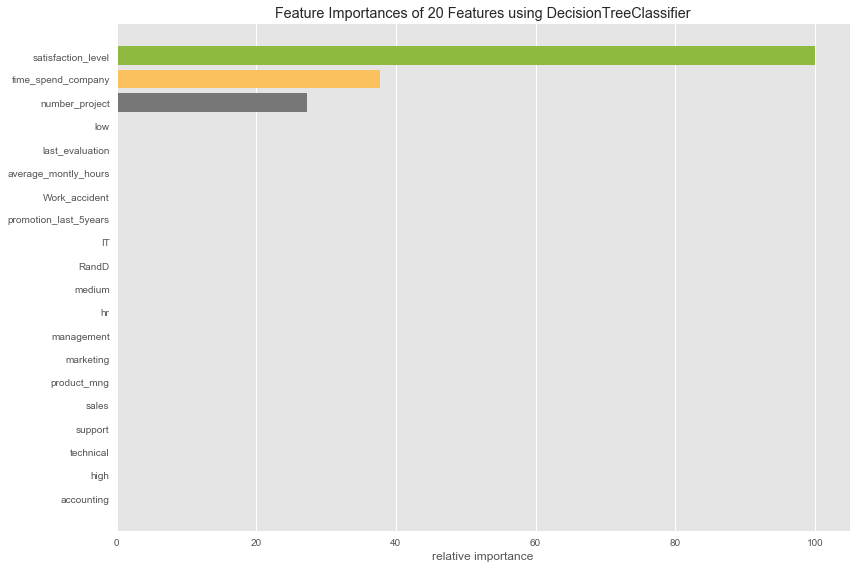

In [74]:
viz=FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show()

### Random Forest

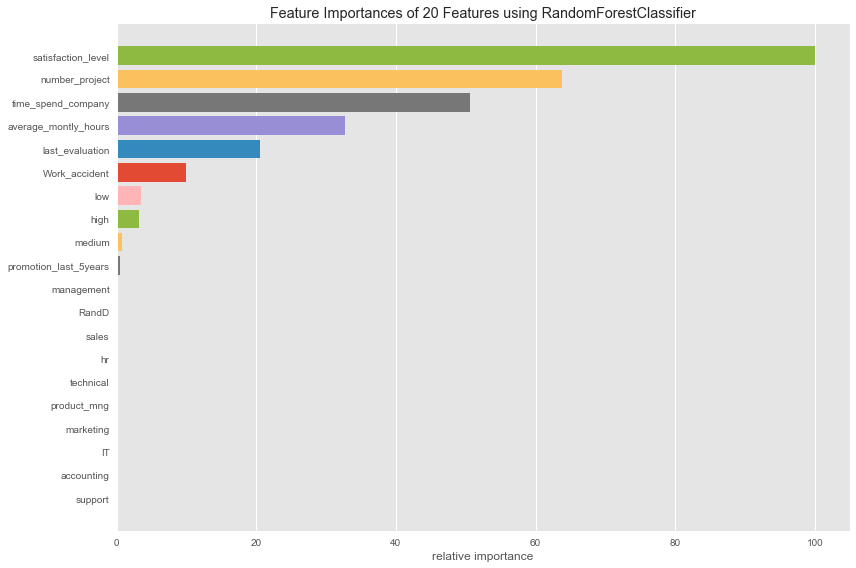

In [75]:
rf=RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0,
                       verbose=False, warm_start=False)

viz=FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()


### ROC Curves

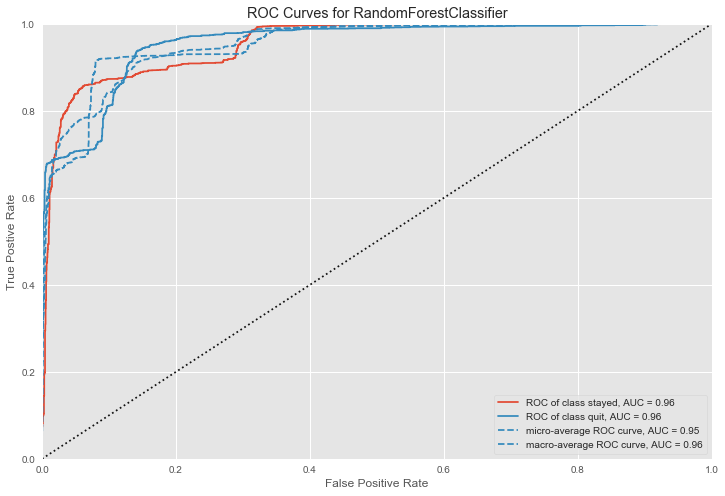

In [76]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(rf,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_train,y_train)
visualizer.poof();

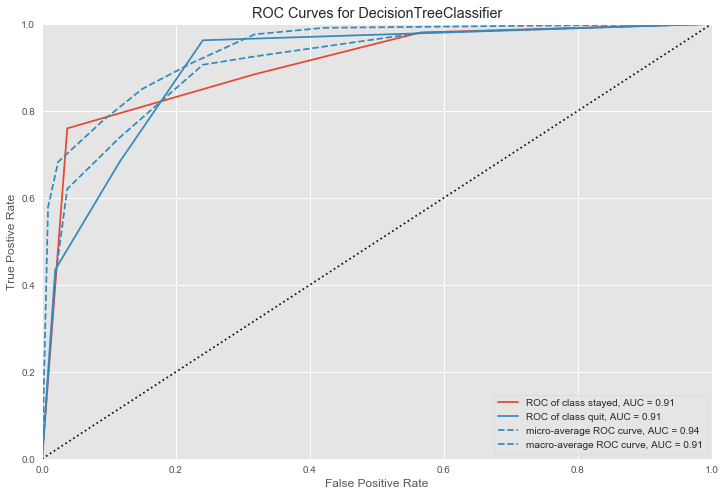

In [77]:
from yellowbrick.classifier import ROCAUC

visualizer=ROCAUC(dt,classes=['stayed','quit'])
visualizer.fit(X_train,y_train)
visualizer.score(X_train,y_train)
visualizer.poof();

### Logistic Regression Classifier

Logistic Regression Accuracy: 0.793


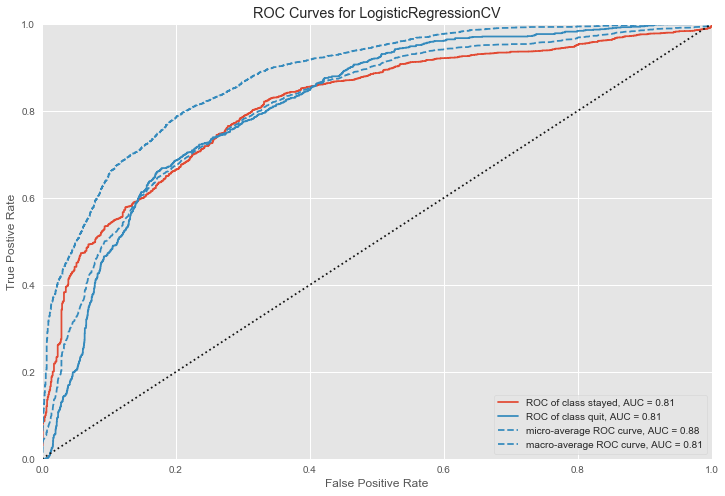

In [78]:
from sklearn.linear_model import LogisticRegressionCV

logit = LogisticRegressionCV(random_state=1, n_jobs=-1,max_iter=500,
                             cv=10)

lr = logit.fit(X_train, y_train)

print('Logistic Regression Accuracy: {:.3f}'.format(accuracy_score(y_test, lr.predict(X_test))))

visualizer = ROCAUC(lr, classes=["stayed", "quit"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.poof();